In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import xgboost as xgb
import pickle


"""Since it is a regression problem, I will use the most regression friendly algorythms, those are dec.Tree and linear regr"""

regr = LinearRegression()


In [3]:
dfrent = pd.read_csv('../Project-5-scikitlearn/rent.csv')
dfsale = pd.read_csv('../Project-5-scikitlearn/sale.csv')

dfsale.drop(columns = ['Unnamed: 0','propertyCode','operation','priceByArea']) 
dfrent.drop(columns = ['Unnamed: 0','propertyCode','operation','priceByArea'])

dfsale[['price','size','floorNumeric']] = dfsale[['price','size','floorNumeric']].astype(int) #specifically this columns convert to integer
dfrent[['price','size','floorNumeric']] = dfrent[['price','size','floorNumeric']].astype(int)

In [4]:
rentdummy = pd.get_dummies(dfrent)
saledummy = pd.get_dummies(dfsale)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(rentdummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']], rentdummy['price'], test_size=0.25,train_size=0.75, random_state=2)


#standardized
x_train_standar = StandardScaler().fit_transform(x_train)
x_test_standar = StandardScaler().fit_transform(x_test)

y_train_standar = StandardScaler().fit_transform(np.array(y_train).reshape(-1,1))
y_test_standar = StandardScaler().fit_transform(np.array(y_test).reshape(-1,1))

y_train_shaped = np.array(y_train).reshape(-1,1)

best_acc = []
acc_list = []


model1 = regr.fit(x_train, y_train_shaped) #Linear model with raw data
cv_acc = cross_validate(model1, x_train, y_train, cv=10)['test_score'].mean()
best_acc.append([cv_acc, 'regression raw'])
acc_list.append(cv_acc)

model2 = regr.fit(x_train_standar, y_train_standar)#Linear model with standard data
cv_acc = cross_validate(model2, x_train_standar, y_train_standar, cv=10)['test_score'].mean()
best_acc.append([cv_acc, 'regression standard'])
acc_list.append(cv_acc)


for depth in range(5,11): #Decision tree loop for raw data
        treereg = tree.DecisionTreeRegressor(max_depth=depth)
        model = treereg.fit(x_train, y_train)
        cv_acc = cross_validate(model, x_train, y_train, cv=10)['test_score'].mean()
        best_acc.append([cv_acc,'tree raw', depth])
        acc_list.append(cv_acc)

for depth in range(5,11): #Decision tree loop for standard data
        treereg = tree.DecisionTreeRegressor(max_depth=depth)
        model = treereg.fit(x_train_standar, y_train_standar)
        cv_acc = cross_validate(model, x_train, y_train, cv=10)['test_score'].mean()
        best_acc.append([cv_acc,'tree standard', depth])
        acc_list.append(cv_acc)


for best in best_acc:
        if best[0] == max(acc_list):
                print("best",best)
        elif best[0]== min(acc_list):
                print("worst", best)

best_acc


best [0.6851819708713187, 'regression raw']
worst [0.35535639930498186, 'tree standard', 10]


[[0.6851819708713187, 'regression raw'],
 [0.6844539562120555, 'regression standard'],
 [0.5257499874660199, 'tree raw', 5],
 [0.4958274209019434, 'tree raw', 6],
 [0.4188921946348736, 'tree raw', 7],
 [0.4106536298624045, 'tree raw', 8],
 [0.37626958536398813, 'tree raw', 9],
 [0.39872488439462567, 'tree raw', 10],
 [0.4939784780473467, 'tree standard', 5],
 [0.5003592172437232, 'tree standard', 6],
 [0.43619073157071914, 'tree standard', 7],
 [0.4048197655645255, 'tree standard', 8],
 [0.36942268019716185, 'tree standard', 9],
 [0.35535639930498186, 'tree standard', 10]]

In [6]:
#The cross validation indicates that for the rent model, we will use regression and raw data
rentmodel = regr.fit(x_train, y_train)

rent_prediction = rentmodel.predict(x_test)

r2_score(y_test, rent_prediction)

0.7930808681611295

In [7]:
#Testing with more random data the best model

test_rent = pd.read_csv('../Project-5-scikitlearn/rent_test_cleaned.csv')
test_rent.drop(columns = ['Unnamed: 0','propertyCode','operation','priceByArea'],inplace =True)
test_rent[['price','size','floorNumeric']] = test_rent[['price','size','floorNumeric']].astype(int)
test_rent_dummy = pd.get_dummies(test_rent)
test_rent_dummy

predict = rentmodel.predict(test_rent_dummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']])
r2_score(test_rent_dummy['price'], predict)

0.7023190701609721

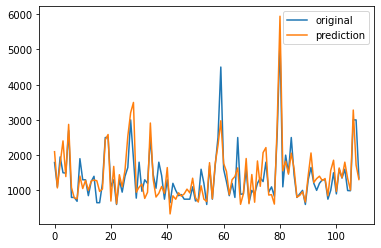

In [8]:
x_ax = range(len(predict))
plt.plot(x_ax, test_rent_dummy['price'], label='original')
plt.plot(x_ax, predict, label='prediction')
plt.legend()
plt.show()

In [9]:
filename_rent = 'rent_model.sav'
pickle.dump(rentmodel, open(filename_rent,'wb'))

In [10]:
x_trainsale, x_testsale, y_trainsale, y_testsale = train_test_split(saledummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']], saledummy['price'], test_size=0.25 ,train_size=0.75, random_state= 3)


#standardized
x_train_standarsale = StandardScaler().fit_transform(x_trainsale)
x_test_standarsale = StandardScaler().fit_transform(x_testsale)

y_train_standarsale = StandardScaler().fit_transform(np.array(y_trainsale).reshape(-1,1))
y_test_standarsale = StandardScaler().fit_transform(np.array(y_testsale).reshape(-1,1))

y_train_shapedsale = np.array(y_trainsale).reshape(-1,1)

best_acc = []
acc_list = []


model1 = regr.fit(x_trainsale, y_train_shapedsale) #Linear model with raw data
cv_acc = cross_validate(model1, x_trainsale, y_trainsale, cv=10)['test_score'].mean()
best_acc.append([cv_acc, 'regression raw'])
acc_list.append(cv_acc)

model2 = regr.fit(x_train_standarsale, y_train_standarsale)#Linear model with standard data
cv_acc = cross_validate(model2, x_train_standarsale, y_train_standarsale, cv=10)['test_score'].mean()
best_acc.append([cv_acc, 'regression standard'])
acc_list.append(cv_acc)


for depth in range(5,11): #Decision tree loop for raw data
        treereg = tree.DecisionTreeRegressor(max_depth=depth)
        model = treereg.fit(x_trainsale, y_trainsale)
        cv_acc = cross_validate(model, x_trainsale, y_trainsale, cv=10)['test_score'].mean()
        best_acc.append([cv_acc,'tree raw', depth])
        acc_list.append(cv_acc)

for depth in range(5,11): #Decision tree loop for standard data
        treereg = tree.DecisionTreeRegressor(max_depth=depth)
        model = treereg.fit(x_train_standarsale, y_train_standarsale)
        cv_acc = cross_validate(model, x_trainsale, y_trainsale, cv=10)['test_score'].mean()
        best_acc.append([cv_acc,'tree standard', depth])
        acc_list.append(cv_acc)


for best in best_acc:
        if best[0] == max(acc_list):
                print("best",best)
        elif best[0]== min(acc_list):
                print("worst", best)

best_acc


worst [0.44257882684212346, 'tree raw', 8]
best [0.6042573206802245, 'tree standard', 5]


[[0.5720393460378965, 'regression raw'],
 [0.5718953713104888, 'regression standard'],
 [0.5965943737707459, 'tree raw', 5],
 [0.5452464768120048, 'tree raw', 6],
 [0.5587993675120385, 'tree raw', 7],
 [0.44257882684212346, 'tree raw', 8],
 [0.4526500749106675, 'tree raw', 9],
 [0.4831832945437945, 'tree raw', 10],
 [0.6042573206802245, 'tree standard', 5],
 [0.4992340335234829, 'tree standard', 6],
 [0.5718319871264643, 'tree standard', 7],
 [0.5056094913593385, 'tree standard', 8],
 [0.5843003333151988, 'tree standard', 9],
 [0.5185703726708175, 'tree standard', 10]]

In [11]:
#The results of the cross validation indicates that the best model is tree standard with depth 5
treeregr = tree.DecisionTreeRegressor(max_depth=5)
salemodel = treeregr.fit(x_train_standarsale, y_train_standarsale)
sale_prediction = salemodel.predict(x_test_standarsale)
r2_score(y_test_standarsale, sale_prediction)


0.4864299847678504

In [12]:
test_sale = pd.read_csv('../Project-5-scikitlearn/sale_test_cleaned.csv')
test_sale.drop(columns = ['Unnamed: 0','propertyCode','operation','priceByArea'],inplace =True)
test_sale[['price','size','floorNumeric']] = test_sale[['price','size','floorNumeric']].astype(int)
test_sale_dummy = pd.get_dummies(test_sale)


test_predict = salemodel.predict(StandardScaler().fit_transform(test_sale_dummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']]))

r2_score( StandardScaler().fit_transform(np.array(test_sale_dummy['price']).reshape(-1,1)), test_predict)

-0.1357244135855591

In [13]:

#since it gives a very low score with the test data, we will use the ensemble method with the xgboost library in the next cells 



In [14]:
data_dmatrix = xgb.DMatrix(data= x_trainsale, label=y_trainsale)

In [15]:

parameters3 = {'booster':'gbtree',
                'objective':'reg:squarederror',
                'learning_rate':0.7,
                'reg_alpha':40, 
                'max_depth':30}#this parameters seems promising


cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=parameters3, 
                    nfold = 5,
                    num_boost_round=30,  
                    metrics="mape", as_pandas=True, seed=2)

cv_results

,train-mape-mean,train-mape-std,test-mape-mean,test-mape-std
0,0.300703,1.762116e-03,0.313814,0.007970
1,0.125380,1.008691e-03,0.221541,0.018268
2,0.060598,5.149433e-04,0.212361,0.015710
3,0.031074,5.590787e-04,0.213829,0.016232
4,0.016660,2.545171e-04,0.216111,0.018721
5,0.009279,1.858468e-04,0.217496,0.019367
6,0.005329,1.628663e-04,0.218159,0.019555
7,0.003136,1.007007e-04,0.218823,0.019912
8,0.001887,7.625064e-05,0.219146,0.019967
9,0.001148,6.279299e-05,0.219245,0.020136


In [16]:
xgb_regr2 = xgb.XGBRegressor(booster='gbtree', 
                    objective ='reg:squarederror', learning_rate=0.7, 
                    reg_alpha = 40, n_estimators = 30, max_depth=30)

xgb_regr2.fit(x_trainsale, y_trainsale)
xgpredict2 = xgb_regr2.predict(x_testsale)
print(np.sqrt(mean_absolute_percentage_error(y_testsale, xgpredict2))) #promising results

0.44622286635971703
C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


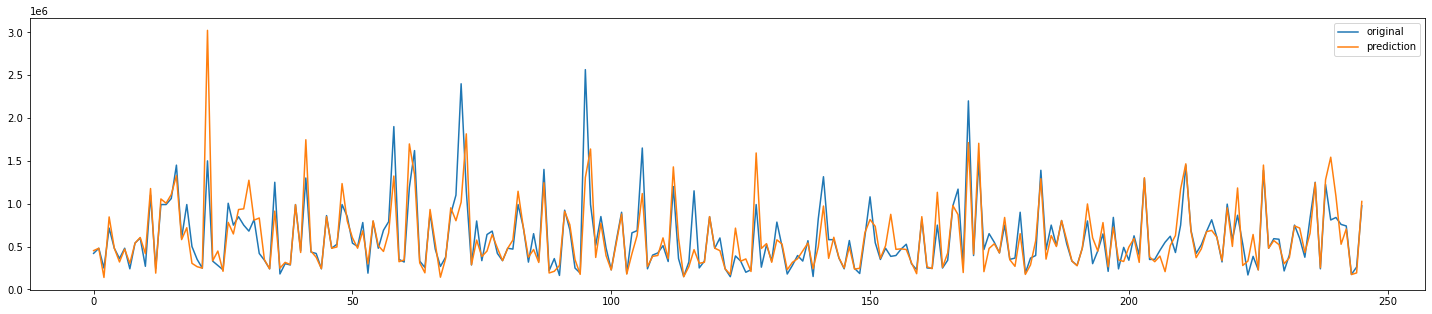

In [17]:
x_ax = range(len(y_testsale))
plt.figure(figsize=(25,5))
plt.plot(x_ax, y_testsale, label='original')
plt.plot(x_ax, xgpredict2, label='prediction')
plt.legend()
plt.show()

In [18]:
prediction_test = xgb_regr2.predict(test_sale_dummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']])

print(np.sqrt(mean_absolute_percentage_error(test_sale_dummy['price'], prediction_test))) 
#this results seems enough, it's the lowest value that i managed to get

0.4638510930843816
C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


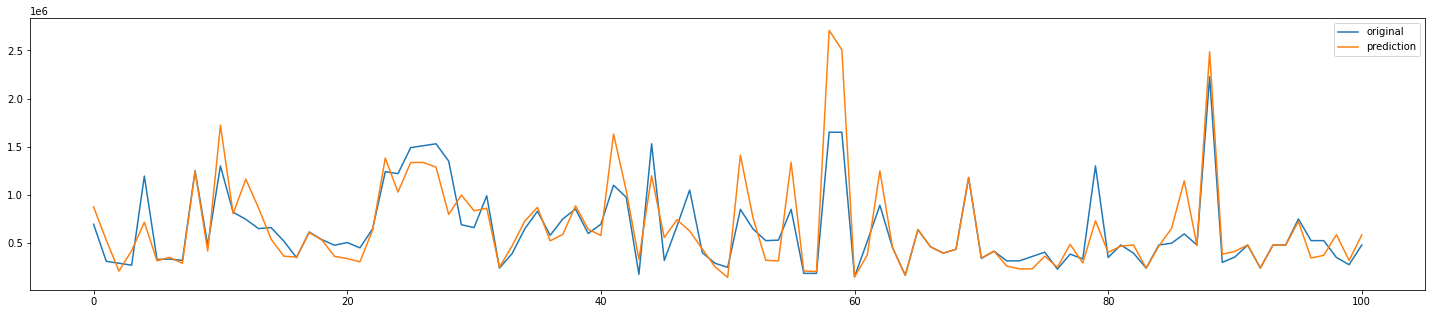

In [19]:
x_ax = range(len(prediction_test))
plt.figure(figsize=(25,5))
plt.plot(x_ax, test_sale_dummy['price'], label='original')
plt.plot(x_ax, prediction_test, label='prediction')
plt.legend()
plt.show()

In [20]:
xgb_regr2.save_model("sale_model.json")